In [ ]:
%tensorflow_version 2.x

In [ ]:
from google.colab import drive
drive.mount('/sample_data/')

Drive already mounted at /sample_data/; to attempt to forcibly remount, call drive.mount("/sample_data/", force_remount=True).


In [ ]:
! mkdir data_1000
! unzip data_1000.zip -d ./data_1000

mkdir: cannot create directory ‘data_1000’: File exists
Archive:  data_1000.zip
 extracting: ./data_1000/35.4527.jpg  
 extracting: ./data_1000/35.4561.jpg  
 extracting: ./data_1000/35.4579.jpg  
 extracting: ./data_1000/35.4595.jpg  
 extracting: ./data_1000/35.4617.jpg  
 extracting: ./data_1000/35.4625.jpg  
 extracting: ./data_1000/35.4637.jpg  
 extracting: ./data_1000/35.4644.jpg  
 extracting: ./data_1000/35.4668.jpg  
 extracting: ./data_1000/35.4674.jpg  
 extracting: ./data_1000/35.4681.jpg  
 extracting: ./data_1000/35.4754.jpg  
 extracting: ./data_1000/35.4787.jpg  
 extracting: ./data_1000/35.4796.jpg  
 extracting: ./data_1000/35.4853.jpg  
 extracting: ./data_1000/35.4893.jpg  
 extracting: ./data_1000/35.4994.jpg  
 extracting: ./data_1000/35.5084.jpg  
 extracting: ./data_1000/35.5102.jpg  
 extracting: ./data_1000/35.5113.jpg  
 extracting: ./data_1000/35.5141.jpg  
 extracting: ./data_1000/35.5254.jpg  
 extracting: ./data_1000/35.5281.jpg  
 extracting: ./data_100

In [ ]:
! zip -FFv With_Helmet_2.zip --out With_Helmet_3.zip
! mkdir With_Helmet_3
! unzip With_Helmet_3.zip -d ./With_Helmet_3

Fix archive (-FF) - salvage what can
 Found end record (EOCDR) - says expect single disk archive
Scanning for entries...
 Local ( 1 2042430): copying: pexels-11387309.jpg   (3036280 bytes)
 Local ( 1 5078759): copying: pexels-11387319 (2).jpg   (3644795 bytes)
 Local ( 1 8723607): copying: pexels-11387319.jpg   (3640860 bytes)
 Local ( 1 12364516): copying: pexels-3642482.jpg   (5158242 bytes)
 Local ( 1 17522806): copying: pexels-3642534.jpg   (3543894 bytes)
 Local ( 1 21066748): copying: pexels-3642537.jpg   (3104115 bytes)
 Local ( 1 24170911): copying: pexels-36425371.jpg   (135233 bytes)
 Local ( 1 24306193): copying: pexels-36425372.jpg   (57781 bytes)
 Local ( 1 24364023): copying: pexels-alari-tammsalu-8024979.jpg   (3518365 bytes)
 Local ( 1 27882451): copying: pexels-amina-filkins-5561176.jpg   (1948351 bytes)
 Local ( 1 29830864): copying: pexels-amina-filkins-5561459.jpg   (4100045 bytes)
 Local ( 1 33930971): copying: pexels-anamul-rezwan-1078879.jpg   (925483 bytes)
 Loc

In [ ]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt
import os 

# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = './With_Helmet_3/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)


X = []
Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 

for file in files:
  X.append(img_read(src,file)/255.)
  Y.append(1) # nomal label : 1

# array로 데이터 변환
X = np.array(X)
Y = np.array(Y)

print('Normal shape:',np.shape(X))

TypeError: ignored

In [ ]:
import sklearn
from sklearn.model_selection import train_test_split

# Train set, Test set으로 나누기 
X_train, X_test, Y_train, Y_test  = train_test_split(X, Y, test_size=0.2, random_state=1,shuffle=True)

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
X_train = X_train.reshape((len(X_train), np.prod(X_train.shape[1:])))
X_test = X_test.reshape((len(X_test), np.prod(X_test.shape[1:])))

print(np.shape(X_train))
print(np.shape(X_test))

TypeError: ignored

**Anomaly(data_1000) unzip**

In [ ]:
# 압축해제된 데이터 경로를 찾아 복사해서 붙여넣어주세요
src = './data_1000/'

# 이미지 읽기
def img_read(src,file):
    img = cv.imread(src+file,cv.COLOR_BGR2GRAY)
    return img

# src 경로에 있는 파일 명을 저장합니다. 
files = os.listdir(src)

ANom = []
ANom_Y = []

# 경로와 파일명을 입력으로 넣어 확인하고 
# 데이터를 255로 나눠서 0~1사이로 정규화 하여 X 리스트에 넣습니다. 
for file in files: 
    ANom.append(img_read(src,file)/255.)
    ANom_Y.append(0) # Anomal label : 0

# array로 데이터 변환
ANom = np.array(ANom)
ANom_Y = np.array(ANom_Y)
print('Anomaly shape:', np.shape(ANom_Y))

# 형태를 3차원에서 2차원으로 변경, 첫 번째 인덱스 : 이미지 수, 두 번쨰 인덱스 : 2차원 이미지를 1차원으로 변경 후의 길이
ANom_images = ANom.reshape((len(ANom), np.prod(ANom.shape[1:])))
print(np.shape(ANom_images))

Anomaly shape: (1000,)
(1000, 3136)


In [ ]:
from __future__ import absolute_import
from __future__ import division
from __future__ import print_function

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras.layers import Dense, Activation
from sklearn.model_selection import train_test_split

In [ ]:
print(tf.__version__)     # 텐서플로우 버전확인 (colab의 기본버전은 1.15.0) --> 2.0 변경 "%tensorflow_version 2.x"
print(keras.__version__)

2.8.2
2.8.0


# Autoencoder model

In [ ]:
def AE():
    ## Encoder 구간
    model = tf.keras.Sequential()
    model.add(Dense(256, input_shape=(56*56,)))  # 입력계층
    model.add(Activation('relu'))      

    model.add(Dense(128))                       # 은닉계층
    model.add(Activation('relu'))

    ## Decoder 구간
    model.add(Dense(128))                        # 은닉계층
    model.add(Activation('relu'))

    model.add(Dense(56*56))                # 출력계층
    model.add(Activation('linear'))

    return model

In [ ]:
# model 함수 실행
model = AE()
model.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 256)               803072    
                                                                 
 activation (Activation)     (None, 256)               0         
                                                                 
 dense_1 (Dense)             (None, 128)               32896     
                                                                 
 activation_1 (Activation)   (None, 128)               0         
                                                                 
 dense_2 (Dense)             (None, 128)               16512     
                                                                 
 activation_2 (Activation)   (None, 128)               0         
                                                                 
 dense_3 (Dense)             (None, 3136)              4

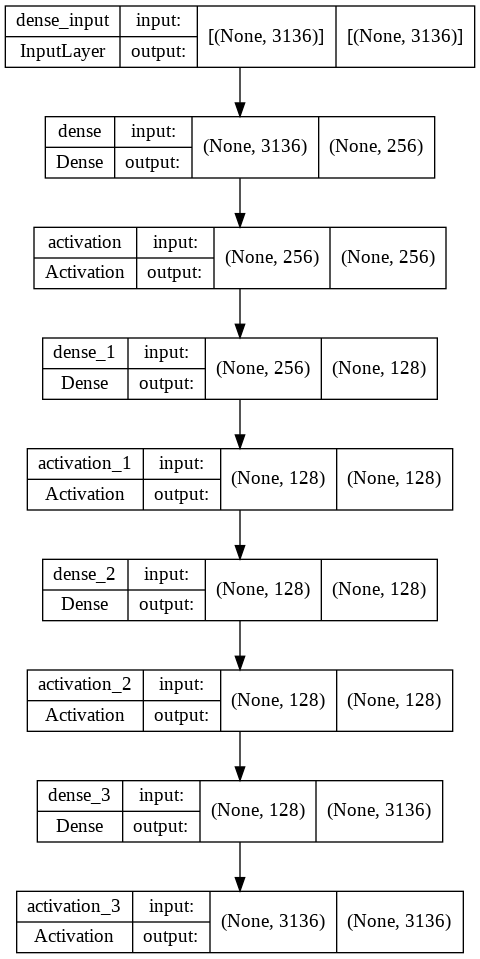

In [ ]:
# 위에서 정한 모델을 그림으로(plot) 보여줌
keras.utils.plot_model(model, to_file='model.png', show_shapes=True, show_layer_names=True) 

**Training**

In [ ]:
# 모델 구조 확정하고 컴파일 진행
model.compile(loss='MSE',                   # MSE : mean square error
              optimizer='adam',                 
              metrics=[ 'mae' ])            # MAE : mean absolute  error  

# model.fit을 써서 학습. 학습과정을 history에 저장
history = model.fit(X_train, X_train,
                    batch_size=256,
                    epochs=20,
                    validation_data=(X_test, X_test),
                    shuffle=True)

NameError: ignored

**Normal data 복원 확인** 

1.   항목 추가
2.   항목 추가



In [ ]:
test_score = model.evaluate(X_test, X_test, verbose=0) # loss 값 결과 확인
print('Normal Test data cost = ', '{:.4f}'.format(test_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction1 = model.predict(X_test)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img1 = X_test[i].reshape(56,56)
  rec_img1 = prediction1[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img1, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img1, cmap=plt.cm.bone)

plt.show()

**Abnormal data 복원 확인 (data_1000)**



Abnormal Testing data cost =  0.4121


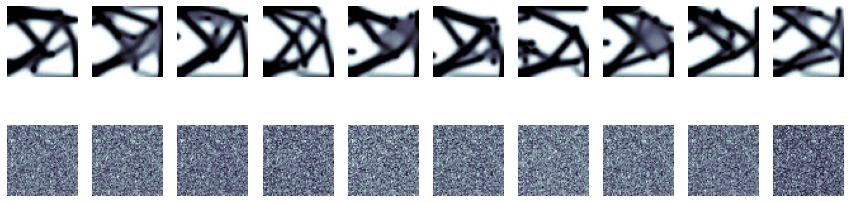

In [ ]:
ANom_score = model.evaluate(ANom_images, ANom_images, verbose=0) # loss 값 결과 확인
print('Abnormal Testing data cost = ', '{:.4f}'.format(ANom_score[0]))

sample_size = 10                        # 보여줄 sample 갯수 설정
prediction2 = model.predict(ANom_images)      # test 데이터로 이미지 복원(predict 함수 사용)

# plot 하기
fig, ax = plt.subplots(2, sample_size, figsize=(15, 4))
for i in range(sample_size):
  org_img2 = ANom_images[i].reshape(56,56)
  rec_img2 = prediction2[i].reshape(56,56)
  
  ax[0][i].set_axis_off()
  ax[1][i].set_axis_off()
  
  ax[0][i].imshow(org_img2, cmap=plt.cm.bone)
  ax[1][i].imshow(rec_img2, cmap=plt.cm.bone)

plt.show()

Test_data & data_1000 예측값(y_pred) 구하기 (AE 통과하기)

1. data_3000과 data_1000의 이미지 별 loss(MSE) 구하기
2. 둘을 비교하여 (히스토그램) 임계값 설정

In [ ]:
import pandas as pd # pandas 라이브러리

# Normal data (data_3000)
Nom_data = np.concatenate((X_test, X_train), axis = 0)
Nom_pred = model.predict(Nom_data) # AE 이미지 결과값 
Nom_pred_mse = np.mean(np.power(Nom_data - Nom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Normal Metric')
Nom_pred_mse_df = pd.DataFrame({'Normal_mse':Nom_pred_mse})
print(Nom_pred_mse_df.describe())

print('\n')

# Abnormal data (data_1000)
ANom_pred = model.predict(ANom_images) # AE 이미지 결과값 
ANom_pred_mse = np.mean(np.power(ANom_images - ANom_pred, 2), axis=1) # input - output 이미지간의 MSE 구하기

# 기초통계학 평균, 분산, 최소값, 최대값, 25%, 50%, 75% 분포 구하는 방법
print('Anomaly Metric')
ANom_pred_mse_df = pd.DataFrame({'Anomaly_mse':ANom_pred_mse})
print(ANom_pred_mse_df.describe())

# 히스토그램 그리기
print('\n')
plt.figure()
plt.title('MSE Histogram') # 그림 이름 설정 
plt.hist(Nom_pred_mse, bins=10, facecolor='blue', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.hist(ANom_pred_mse, bins=10, facecolor='red', histtype='step') #히스토그램 함수, bins:데이터를 범주화 하는 기준
plt.show()

비교 가능하도록 데이터 설정 (data_3000 중 20%의 x_test + data_1000)

In [ ]:
test_data = np.concatenate((X_test, ANom_images), axis = 0)
y_true = np.concatenate((Y_test, ANom_Y), axis = 0)

print(np.shape(test_data))
print(np.shape(y_true))